In [108]:
import numpy as np

In [109]:
import os, sys
import pandas as pd
from sklearn.model_selection import train_test_split
APP_PATH = os.getcwd()
#dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "Input_Guaruja.csv"))) #Input_POA  diabetes spc_data_landslides
dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "Input_POA.csv"))) #Input_POA  diabetes spc_data_landslides
dataset

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
0,13.452180,127.04240,59.22540,2230,2741,6.376712,0.008905,0
1,15.656500,110.69380,203.50100,1320,2741,5.476123,0.065837,0
2,1.895332,215.47270,10.00250,2110,2790,10.594538,-0.020116,0
3,1.016567,39.76366,5.45029,1620,2790,10.741805,-0.003531,0
4,11.090160,178.25730,68.48230,1210,2742,7.579783,-0.000890,0
...,...,...,...,...,...,...,...,...
95,37.890990,336.34500,177.72200,2230,2773,6.217178,-0.021211,1
96,7.045130,99.54131,37.76530,1420,2742,9.468263,-0.018692,1
97,16.295700,216.57440,106.03300,2230,2773,9.182029,-0.015873,1
98,3.906067,50.09582,19.37700,2210,1507,7.014249,-0.000092,0


In [110]:
# split data into X and y - POA
X = dataset

## General Preprocessing

### Pré-processamento das variáveis contínuas

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   slope      100 non-null    float64
 1   aspect     100 non-null    float64
 2   elevation  100 non-null    float64
 3   uso_solo   100 non-null    int64  
 4   lito       100 non-null    int64  
 5   twi        100 non-null    float64
 6   curv       100 non-null    float64
 7   class      100 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 6.4 KB


In [112]:
X['uso_solo'].unique()
# Inicialmente exibir os valores de domínio (únicos).

array([2230, 1320, 2110, 1620, 1210, 1420, 2300, 1310, 1220, 2220, 2210,
       1410], dtype=int64)

In [113]:
X['lito'].unique()

array([2741, 2790, 2742, 1507, 2773], dtype=int64)

In [114]:
### Pré-processamento das variáveis discretas
#### aquelas cujo conjunto de resultados possíveis é finito ou enumerável.

Serão pré-processadas as seguintes variáveis discretas: slope, aspect, elevation, twi, curv. 

In [115]:
pd.get_dummies(X['uso_solo']) 

,1210,1220,1310,1320,1410,1420,1620,2110,2210,2220,2230,2300
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,1,0
96,0,0,0,0,0,1,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,1,0
98,0,0,0,0,0,0,0,0,1,0,0,0


In [117]:
pd.get_dummies(X['uso_solo'], prefix = 'uso_solo', prefix_sep = ':')
# Criação das variáveis auxiliares 'dummy' para variável 'uso_solo'.

,uso_solo:1210,uso_solo:1220,uso_solo:1310,uso_solo:1320,uso_solo:1410,uso_solo:1420,uso_solo:1620,uso_solo:2110,uso_solo:2210,uso_solo:2220,uso_solo:2230,uso_solo:2300
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,1,0
96,0,0,0,0,0,1,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,1,0
98,0,0,0,0,0,0,0,0,1,0,0,0


In [118]:
suscetibility_data_dummies = [pd.get_dummies(X['uso_solo'], prefix = 'uso_solo', prefix_sep = ':'),
                              pd.get_dummies(X['lito'], prefix = 'lito', prefix_sep = ':')]
# Criação das variáveis dummy para as 8 variáveis independentes originais, e as salvamos numa lista.
# Sugiro a seguinte taxonomia para as todas as variáveis dummies: nome da variável original, dois pontos, nome da categoria.

In [119]:
suscetibility_data_dummies = pd.concat(suscetibility_data_dummies, axis = 1)
# Por fim concateno as variáveis dummies previamente salvas na lista ao dataframe.

In [120]:
X = pd.concat([X, suscetibility_data_dummies], axis = 1)
# Concatena os dois data frames - original e das variáveis dummies. 
X.columns.values
# Verifica se deu tudo certo.

array(['slope', 'aspect', 'elevation', 'uso_solo', 'lito', 'twi', 'curv',
       'class', 'uso_solo:1210', 'uso_solo:1220', 'uso_solo:1310',
       'uso_solo:1320', 'uso_solo:1410', 'uso_solo:1420', 'uso_solo:1620',
       'uso_solo:2110', 'uso_solo:2210', 'uso_solo:2220', 'uso_solo:2230',
       'uso_solo:2300', 'lito:1507', 'lito:2741', 'lito:2742',
       'lito:2773', 'lito:2790'], dtype=object)

In [121]:
# enfim isola as features
y= dataset['class']
X = X.drop('class',axis=1)

In [122]:
# split data into training and testing sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [123]:
##### Inicializa os datasets de treino ou teste ######
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
#####
df_inputs_prepr = X_train
df_targets_prepr = y_train

In [124]:
#Passo a passo, inicialmente para variável grade.
df_inputs_prepr['uso_solo'].unique()

array([1320, 2110, 2300, 2230, 1420, 1620, 1210, 1410, 1310, 2210, 2220,
       1220], dtype=int64)

In [125]:
df1 = pd.concat([df_inputs_prepr['uso_solo'], df_targets_prepr], axis = 1)
# Concatena os dataframes de por variável [uso_solo] e os targets (variável dependente) .
df1.head()

,uso_solo,class
50,1320,0
2,2110,0
17,2300,1
85,2230,0
5,2230,0


In [126]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# Agrupa os dados de acordo com um critério em uma coluna.
# Nesse caso, agrupei a coluna e agregamos os valores no indice 1.
# Nesse caso, a função de agregação é contá-los.

,uso_solo,class
0,1210,8
1,1220,1
2,1310,3
3,1320,3
4,1410,1
5,1420,7
6,1620,2
7,2110,2
8,2210,1
9,2220,3


In [127]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
# Agrupa os dados de acordo com um critério em uma coluna.
# Nesse caso, agrupei a coluna e agregamos os valores no indice 1.
# Nesse caso, a função de agregação é sua média, - que reflete o percentual de incidencia de escorregamentos por litologia.

,uso_solo,class
0,1210,0.000000
1,1220,1.000000
2,1310,0.666667
3,1320,0.000000
4,1410,0.000000
5,1420,0.142857
6,1620,0.000000
7,2110,0.000000
8,2210,0.000000
9,2220,0.333333


In [128]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
# concatena as colunas.
df1

,uso_solo,class,uso_solo,class
0,1210,8,1210,0.000000
1,1220,1,1220,1.000000
2,1310,3,1310,0.666667
3,1320,3,1320,0.000000
4,1410,1,1410,0.000000
5,1420,7,1420,0.142857
6,1620,2,1620,0.000000
7,2110,2,2110,0.000000
8,2210,1,2210,0.000000
9,2220,3,2220,0.333333


In [129]:
df1 = df1.iloc[:, [0, 1, 3]]
# remove uma das colunas 'uso_solo'
df1

,uso_solo,class,class
0,1210,8,0.000000
1,1220,1,1.000000
2,1310,3,0.666667
3,1320,3,0.000000
4,1410,1,0.000000
5,1420,7,0.142857
6,1620,2,0.000000
7,2110,2,0.000000
8,2210,1,0.000000
9,2220,3,0.333333


In [130]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_susce']
# renomeia as colunas com os totalizadores e proporções.
df1

,uso_solo,n_obs,prop_susce
0,1210,8,0.000000
1,1220,1,1.000000
2,1310,3,0.666667
3,1320,3,0.000000
4,1410,1,0.000000
5,1420,7,0.142857
6,1620,2,0.000000
7,2110,2,0.000000
8,2210,1,0.000000
9,2220,3,0.333333


In [131]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# Calcula a proporção dos números de observação para cada 'uso_solo' e a salva em uma nova variável
df1

,uso_solo,n_obs,prop_susce,prop_n_obs
0,1210,8,0.000000,0.1000
1,1220,1,1.000000,0.0125
2,1310,3,0.666667,0.0375
3,1320,3,0.000000,0.0375
4,1410,1,0.000000,0.0125
5,1420,7,0.142857,0.0875
6,1620,2,0.000000,0.0250
7,2110,2,0.000000,0.0250
8,2210,1,0.000000,0.0125
9,2220,3,0.333333,0.0375


In [132]:
df1['n_susce'] = df1['prop_susce'] * df1['n_obs']
# Calcula o número de bons e mals para cada tipo de categoria, multiplicando as proporções pelo número de observações.
df1['n_N_susce'] = (1 - df1['prop_susce']) * df1['n_obs']
df1

,uso_solo,n_obs,prop_susce,prop_n_obs,n_susce,n_N_susce
0,1210,8,0.000000,0.1000,0.0,8.0
1,1220,1,1.000000,0.0125,1.0,0.0
2,1310,3,0.666667,0.0375,2.0,1.0
3,1320,3,0.000000,0.0375,0.0,3.0
4,1410,1,0.000000,0.0125,0.0,1.0
5,1420,7,0.142857,0.0875,1.0,6.0
6,1620,2,0.000000,0.0250,0.0,2.0
7,2110,2,0.000000,0.0250,0.0,2.0
8,2210,1,0.000000,0.0125,0.0,1.0
9,2220,3,0.333333,0.0375,1.0,2.0


In [133]:
# Calcula as proporções dos números de pontos suscetíveis e não-suscetíveis
df1['prop_n_susce'] = df1['n_susce'] / df1['n_susce'].sum()
df1['prop_n_N_susce'] = df1['n_N_susce'] / df1['n_N_susce'].sum()
df1

,uso_solo,n_obs,prop_susce,prop_n_obs,n_susce,n_N_susce,prop_n_susce,prop_n_N_susce
0,1210,8,0.000000,0.1000,0.0,8.0,0.000000,0.228571
1,1220,1,1.000000,0.0125,1.0,0.0,0.022222,0.000000
2,1310,3,0.666667,0.0375,2.0,1.0,0.044444,0.028571
3,1320,3,0.000000,0.0375,0.0,3.0,0.000000,0.085714
4,1410,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571
5,1420,7,0.142857,0.0875,1.0,6.0,0.022222,0.171429
6,1620,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143
7,2110,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143
8,2210,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571
9,2220,3,0.333333,0.0375,1.0,2.0,0.022222,0.057143


In [134]:
df1['WoE'] = np.log(df1['prop_n_susce'] / df1['prop_n_N_susce'])
# finalmente temos o WoE aplicando o logaritmo natural da divisão das proporções de bons dividido das dos mals.
df1

C:\Caio\Miniconda3\envs\cashme\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,uso_solo,n_obs,prop_susce,prop_n_obs,n_susce,n_N_susce,prop_n_susce,prop_n_N_susce,WoE
0,1210,8,0.000000,0.1000,0.0,8.0,0.000000,0.228571,-inf
1,1220,1,1.000000,0.0125,1.0,0.0,0.022222,0.000000,inf
2,1310,3,0.666667,0.0375,2.0,1.0,0.044444,0.028571,0.441833
3,1320,3,0.000000,0.0375,0.0,3.0,0.000000,0.085714,-inf
4,1410,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf
5,1420,7,0.142857,0.0875,1.0,6.0,0.022222,0.171429,-2.043074
6,1620,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf
7,2110,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf
8,2210,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf
9,2220,3,0.333333,0.0375,1.0,2.0,0.022222,0.057143,-0.944462


In [135]:
df1 = df1.sort_values(['WoE'])
# Ordena o dataframe pelos valores do indicador WoE.
df1 = df1.reset_index(drop = True)
# E, reseta os indices dos registros do dataframe.
df1

,uso_solo,n_obs,prop_susce,prop_n_obs,n_susce,n_N_susce,prop_n_susce,prop_n_N_susce,WoE
0,1210,8,0.000000,0.1000,0.0,8.0,0.000000,0.228571,-inf
1,1320,3,0.000000,0.0375,0.0,3.0,0.000000,0.085714,-inf
2,1410,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf
3,1620,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf
4,2110,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf
5,2210,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf
6,1420,7,0.142857,0.0875,1.0,6.0,0.022222,0.171429,-2.043074
7,2220,3,0.333333,0.0375,1.0,2.0,0.022222,0.057143,-0.944462
8,1310,3,0.666667,0.0375,2.0,1.0,0.044444,0.028571,0.441833
9,2300,4,0.750000,0.0500,3.0,1.0,0.066667,0.028571,0.847298


In [136]:
df1['diff_prop_susce'] = df1['prop_susce'].diff().abs()
# Calcula a diferença entre as proporções dos bons pagadores entre as categorias.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# Calcula a diferença entre as proporções dos mals pagadores entre as categorias.
df1

C:\Caio\Miniconda3\envs\cashme\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,uso_solo,n_obs,prop_susce,prop_n_obs,n_susce,n_N_susce,prop_n_susce,prop_n_N_susce,WoE,diff_prop_susce,diff_WoE
0,1210,8,0.000000,0.1000,0.0,8.0,0.000000,0.228571,-inf,NaN,NaN
1,1320,3,0.000000,0.0375,0.0,3.0,0.000000,0.085714,-inf,0.000000,NaN
2,1410,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf,0.000000,NaN
3,1620,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf,0.000000,NaN
4,2110,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf,0.000000,NaN
5,2210,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf,0.000000,NaN
6,1420,7,0.142857,0.0875,1.0,6.0,0.022222,0.171429,-2.043074,0.142857,inf
7,2220,3,0.333333,0.0375,1.0,2.0,0.022222,0.057143,-0.944462,0.190476,1.098612
8,1310,3,0.666667,0.0375,2.0,1.0,0.044444,0.028571,0.441833,0.333333,1.386294
9,2300,4,0.750000,0.0500,3.0,1.0,0.066667,0.028571,0.847298,0.083333,0.405465


In [137]:
df1['IV'] = (df1['prop_n_susce'] - df1['prop_n_N_susce']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# Por fim calcula a Information Value (IV) da variável.
df1

,uso_solo,n_obs,prop_susce,prop_n_obs,n_susce,n_N_susce,prop_n_susce,prop_n_N_susce,WoE,diff_prop_susce,diff_WoE,IV
0,1210,8,0.000000,0.1000,0.0,8.0,0.000000,0.228571,-inf,NaN,NaN,inf
1,1320,3,0.000000,0.0375,0.0,3.0,0.000000,0.085714,-inf,0.000000,NaN,inf
2,1410,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf,0.000000,NaN,inf
3,1620,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf,0.000000,NaN,inf
4,2110,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf,0.000000,NaN,inf
5,2210,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf,0.000000,NaN,inf
6,1420,7,0.142857,0.0875,1.0,6.0,0.022222,0.171429,-2.043074,0.142857,inf,inf
7,2220,3,0.333333,0.0375,1.0,2.0,0.022222,0.057143,-0.944462,0.190476,1.098612,inf
8,1310,3,0.666667,0.0375,2.0,1.0,0.044444,0.028571,0.441833,0.333333,1.386294,inf
9,2300,4,0.750000,0.0500,3.0,1.0,0.066667,0.028571,0.847298,0.083333,0.405465,inf


In [138]:
# Função para calcular o WoE das variáveis discretas
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# A função recebe 3 argumetnos: um dataframe, string com o nome da variável e o dataframe com os valores da variável dependente
# A função retorna um dataframe com o resultado das proporções das categorias e os indicadores WoE e IV.

In [139]:
# 'uso_solo'
df_temp = woe_discrete(df_inputs_prepr, 'uso_solo', df_targets_prepr)
# Execução da função para a variável 'uso_solo' 
df_temp

C:\Caio\Miniconda3\envs\cashme\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Caio\Miniconda3\envs\cashme\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,uso_solo,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1210,8,0.000000,0.1000,0.0,8.0,0.000000,0.228571,-inf,NaN,NaN,inf
1,1320,3,0.000000,0.0375,0.0,3.0,0.000000,0.085714,-inf,0.000000,NaN,inf
2,1410,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf,0.000000,NaN,inf
3,1620,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf,0.000000,NaN,inf
4,2110,2,0.000000,0.0250,0.0,2.0,0.000000,0.057143,-inf,0.000000,NaN,inf
5,2210,1,0.000000,0.0125,0.0,1.0,0.000000,0.028571,-inf,0.000000,NaN,inf
6,1420,7,0.142857,0.0875,1.0,6.0,0.022222,0.171429,-2.043074,0.142857,inf,inf
7,2220,3,0.333333,0.0375,1.0,2.0,0.022222,0.057143,-0.944462,0.190476,1.098612,inf
8,1310,3,0.666667,0.0375,2.0,1.0,0.044444,0.028571,0.441833,0.333333,1.386294,inf
9,2300,4,0.750000,0.0500,3.0,1.0,0.066667,0.028571,0.847298,0.083333,0.405465,inf


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports das bibliotecas gráficas.
sns.set()
# Define o estilo padrão da biblioteca seaborn. 

In [141]:
# Função para exibir o indicador WoE para cada valor da variável discreta.
# Recebe como parametro o dataframe com os indicadores previamente calculados e o angulo de rotação dos labels do eixo X.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # transforma os valores numeráveis da variável sob anaálise me um array de stringe a o atribui a variável x.
    y = df_WoE['WoE']
    # Seleciona a coluna 'WoE' e a atribui a variável y.
    plt.figure(figsize=(18, 6))
    #tamanho da figura
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plota os datapoints
    # Define cada ponto de dados com um circulo, as linhas pontilhadas e de cor preta.
    plt.xlabel(df_WoE.columns[0])
    
    plt.ylabel('Weight of Evidence')

    plt.title(str('Weight of Evidence de ' + df_WoE.columns[0]))
    
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotaciona os labels com o angulo de rotação.

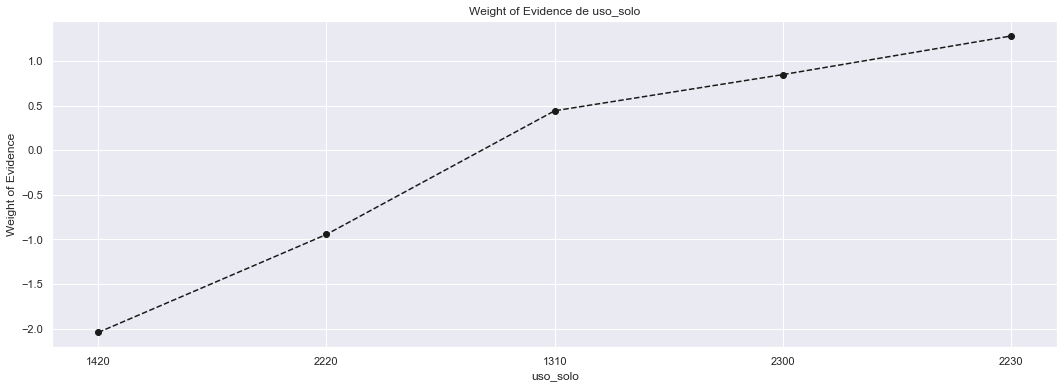

In [142]:
plot_by_woe(df_temp)
# Executa função para exibir o gráfico do indicador WoE de cada valor da variável.

### Pré-processamento das variáveis discretas: Criação das variáveis dummy para as demais features

In [67]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'lito', df_targets_prepr)
df_temp

C:\Caio\Miniconda3\envs\cashme\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,lito,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2790,12,0.000000,0.1500,0.0,12.0,0.000000,0.342857,-inf,NaN,NaN,inf
1,1507,14,0.357143,0.1750,5.0,9.0,0.111111,0.257143,-0.839101,0.357143,inf,inf
2,2773,12,0.583333,0.1500,7.0,5.0,0.155556,0.142857,0.085158,0.226190,0.924259,inf
3,2741,31,0.774194,0.3875,24.0,7.0,0.533333,0.200000,0.980829,0.190860,0.895671,inf
4,2742,11,0.818182,0.1375,9.0,2.0,0.200000,0.057143,1.252763,0.043988,0.271934,inf


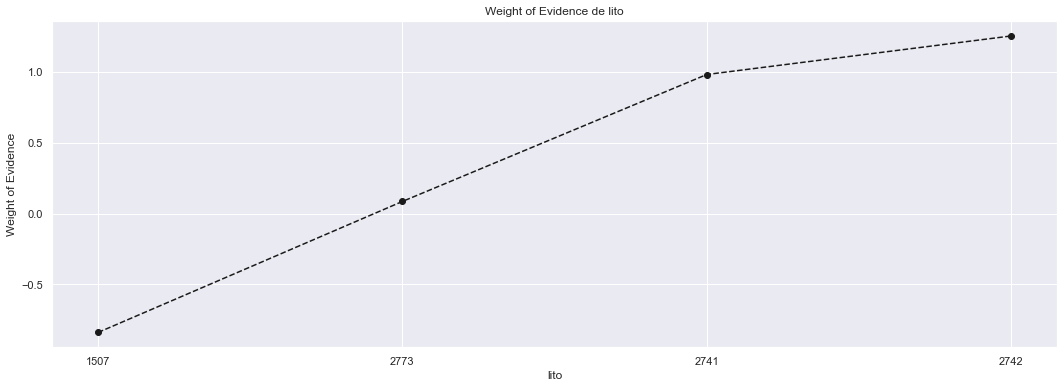

In [68]:
plot_by_woe(df_temp)

### Pré-processamento das variáveis contínuas: Automação do calculo e visualização dos resultados

In [69]:
# Função WoE para as variáveis contínuas ordenadas
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# função similar a anterior, ...
# ... com uma pequena diferença: a ordenação do dataframe é feito pelo valor da variável e não pelo WoE.

In [70]:
# term
df_inputs_prepr['lito'].unique()
# Nesse caso temos apenas duas valores unicos, 36 and 60.

array([2790, 1507, 2741, 2773, 2742], dtype=int64)

In [71]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'lito', df_targets_prepr)
#calculo do weight of evidence.
df_temp

C:\Caio\Miniconda3\envs\cashme\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,lito,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1507,14,0.357143,0.1750,5.0,9.0,0.111111,0.257143,-0.839101,NaN,NaN,inf
1,2741,31,0.774194,0.3875,24.0,7.0,0.533333,0.200000,0.980829,0.417051,1.819930,inf
2,2742,11,0.818182,0.1375,9.0,2.0,0.200000,0.057143,1.252763,0.043988,0.271934,inf
3,2773,12,0.583333,0.1500,7.0,5.0,0.155556,0.142857,0.085158,0.234848,1.167605,inf
4,2790,12,0.000000,0.1500,0.0,12.0,0.000000,0.342857,-inf,0.583333,inf,inf


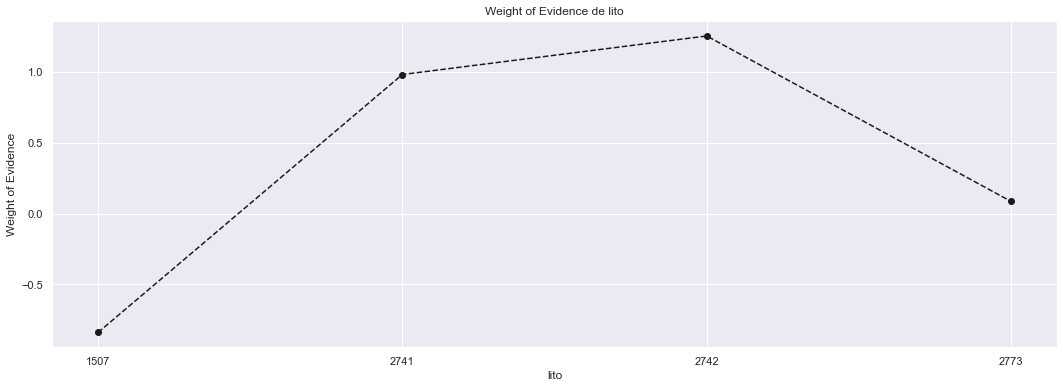

In [72]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### Pré-processamento das variáveis contínuas: Mais variáveis dummies

In [82]:
# slope
df_inputs_prepr['slope_factor'] = pd.cut(df_inputs_prepr['slope'], 5)
# Aqui temos um cenário clássico de fine-classing: usando o método 'cut', dividimos a variável em 5 categorias por seus
# respectivos valores.

<ipython-input-82-c1a41e82421d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['slope_factor'] = pd.cut(df_inputs_prepr['slope'], 5)


In [83]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'slope_factor', df_targets_prepr)
df_temp

,slope_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.945, 10.883]",27,0.111111,0.3375,3.0,24.0,0.066667,0.685714,-2.330756,NaN,NaN,inf
1,"(10.883, 20.773]",21,0.571429,0.2625,12.0,9.0,0.266667,0.257143,0.036368,0.460317,2.367124,inf
2,"(20.773, 30.662]",14,0.928571,0.1750,13.0,1.0,0.288889,0.028571,2.313635,0.357143,2.277267,inf
3,"(30.662, 40.551]",13,0.923077,0.1625,12.0,1.0,0.266667,0.028571,2.233592,0.005495,0.080043,inf
4,"(40.551, 50.441]",5,1.000000,0.0625,5.0,0.0,0.111111,0.000000,inf,0.076923,inf,inf


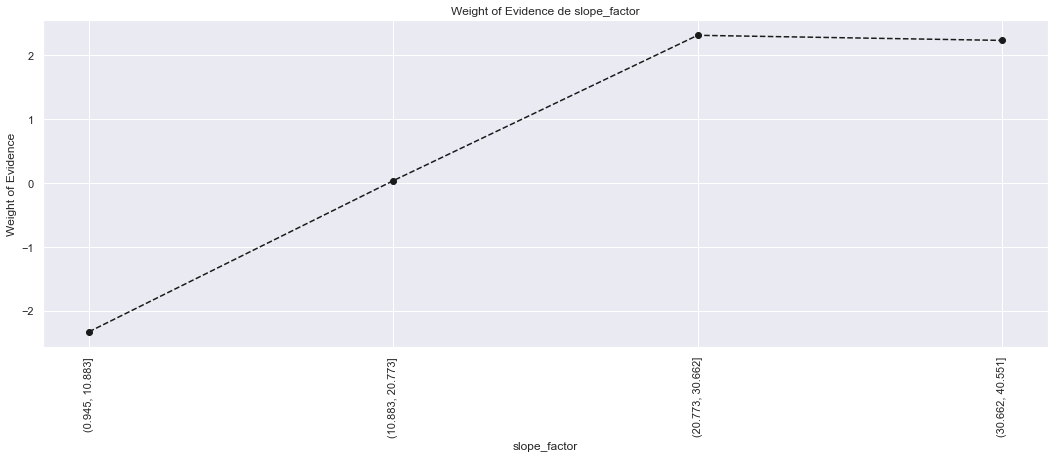

In [84]:
plot_by_woe(df_temp, 90)

In [85]:
df_inputs_prepr['aspect_factor'] = pd.cut(df_inputs_prepr['aspect'], 5)

<ipython-input-85-b6394fe6458c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['aspect_factor'] = pd.cut(df_inputs_prepr['aspect'], 5)


In [86]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'aspect_factor', df_targets_prepr)
df_temp

,aspect_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.066, 73.736]",20,0.600000,0.2500,12.0,8.0,0.266667,0.228571,0.154151,NaN,NaN,0.495907
1,"(73.736, 144.055]",9,0.333333,0.1125,3.0,6.0,0.066667,0.171429,-0.944462,0.266667,1.098612,0.495907
2,"(144.055, 214.373]",14,0.285714,0.1750,4.0,10.0,0.088889,0.285714,-1.167605,0.047619,0.223144,0.495907
3,"(214.373, 284.692]",14,0.714286,0.1750,10.0,4.0,0.222222,0.114286,0.664976,0.428571,1.832581,0.495907
4,"(284.692, 355.01]",23,0.695652,0.2875,16.0,7.0,0.355556,0.200000,0.575364,0.018634,0.089612,0.495907


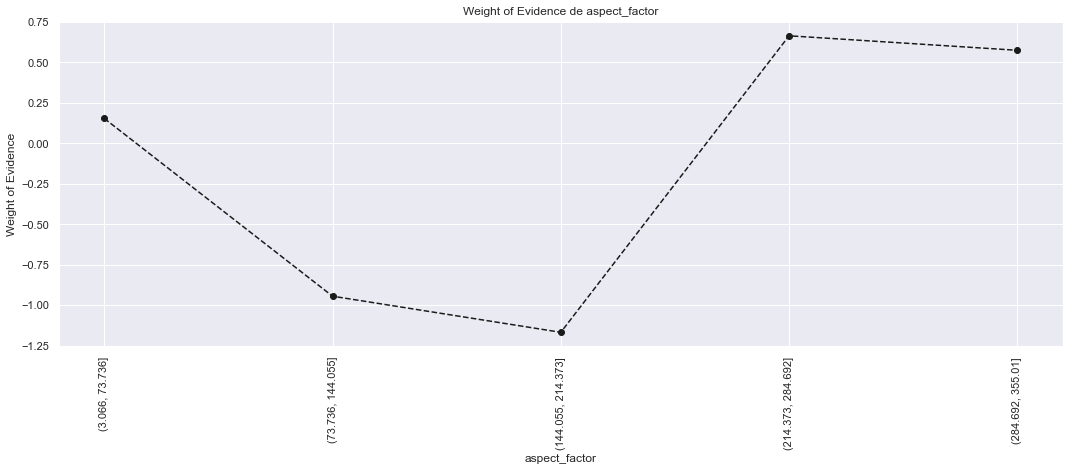

In [87]:
plot_by_woe(df_temp, 90)

In [88]:
df_inputs_prepr['elevation_factor'] = pd.cut(df_inputs_prepr['elevation'], 5)

<ipython-input-88-60392fe1f902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['elevation_factor'] = pd.cut(df_inputs_prepr['elevation'], 5)


In [89]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'elevation_factor', df_targets_prepr)
df_temp

,elevation_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.674, 52.286]",27,0.185185,0.3375,5.0,22.0,0.111111,0.628571,-1.732919,NaN,NaN,inf
1,"(52.286, 103.642]",20,0.700000,0.2500,14.0,6.0,0.311111,0.171429,0.595983,0.514815,2.328902,inf
2,"(103.642, 154.998]",19,0.684211,0.2375,13.0,6.0,0.288889,0.171429,0.521875,0.015789,0.074108,inf
3,"(154.998, 206.354]",10,0.900000,0.1250,9.0,1.0,0.200000,0.028571,1.945910,0.215789,1.424035,inf
4,"(206.354, 257.71]",4,1.000000,0.0500,4.0,0.0,0.088889,0.000000,inf,0.100000,inf,inf


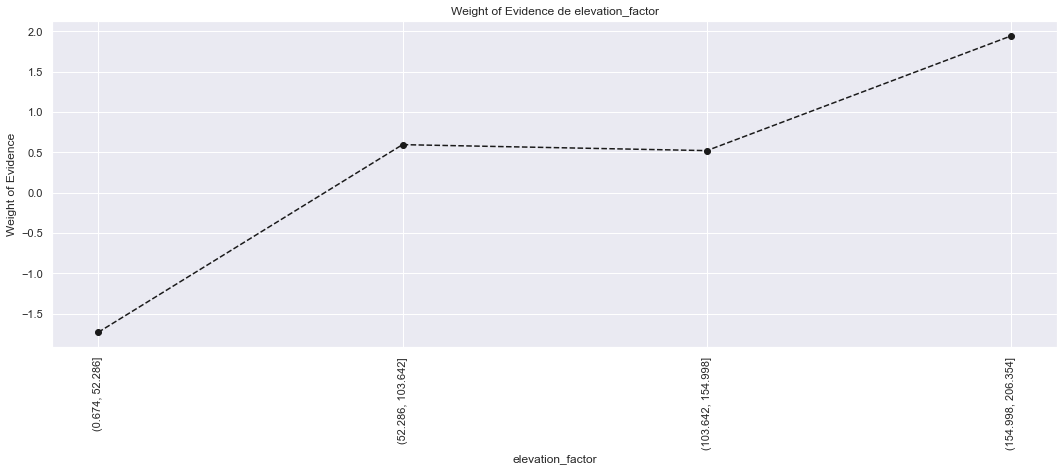

In [90]:
plot_by_woe(df_temp, 90)

In [95]:
df_inputs_prepr['twi_factor'] = pd.cut(df_inputs_prepr['twi'], 5)
df_inputs_prepr['curv_factor'] = pd.cut(df_inputs_prepr['curv'], 5)

<ipython-input-95-4bc8f204dba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['twi_factor'] = pd.cut(df_inputs_prepr['twi'], 5)
<ipython-input-95-4bc8f204dba3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['curv_factor'] = pd.cut(df_inputs_prepr['curv'], 5)


In [96]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'twi_factor', df_targets_prepr)
df_temp

C:\Caio\Miniconda3\envs\cashme\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,twi_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.428, 6.511]",24,0.750000,0.3000,18.0,6.0,0.400000,0.171429,0.847298,NaN,NaN,inf
1,"(6.511, 7.589]",24,0.625000,0.3000,15.0,9.0,0.333333,0.257143,0.259511,0.125000,0.587787,inf
2,"(7.589, 8.667]",15,0.400000,0.1875,6.0,9.0,0.133333,0.257143,-0.656780,0.225000,0.916291,inf
3,"(8.667, 9.746]",13,0.461538,0.1625,6.0,7.0,0.133333,0.200000,-0.405465,0.061538,0.251314,inf
4,"(9.746, 10.824]",4,0.000000,0.0500,0.0,4.0,0.000000,0.114286,-inf,0.461538,inf,inf


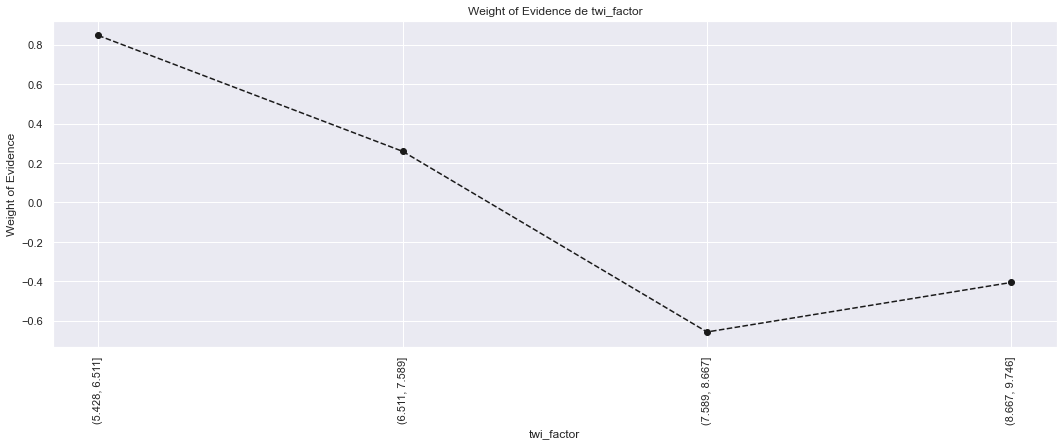

In [97]:
plot_by_woe(df_temp, 90)

In [98]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'curv_factor', df_targets_prepr)
df_temp

,curv_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.0469, -0.0242]",11,0.727273,0.1375,8.0,3.0,0.177778,0.085714,0.729515,NaN,NaN,0.181096
1,"(-0.0242, -0.0016]",36,0.583333,0.4500,21.0,15.0,0.466667,0.428571,0.085158,0.143939,0.644357,0.181096
2,"(-0.0016, 0.021]",27,0.444444,0.3375,12.0,15.0,0.266667,0.428571,-0.474458,0.138889,0.559616,0.181096
3,"(0.021, 0.0436]",2,0.500000,0.0250,1.0,1.0,0.022222,0.028571,-0.251314,0.055556,0.223144,0.181096
4,"(0.0436, 0.0662]",4,0.750000,0.0500,3.0,1.0,0.066667,0.028571,0.847298,0.250000,1.098612,0.181096


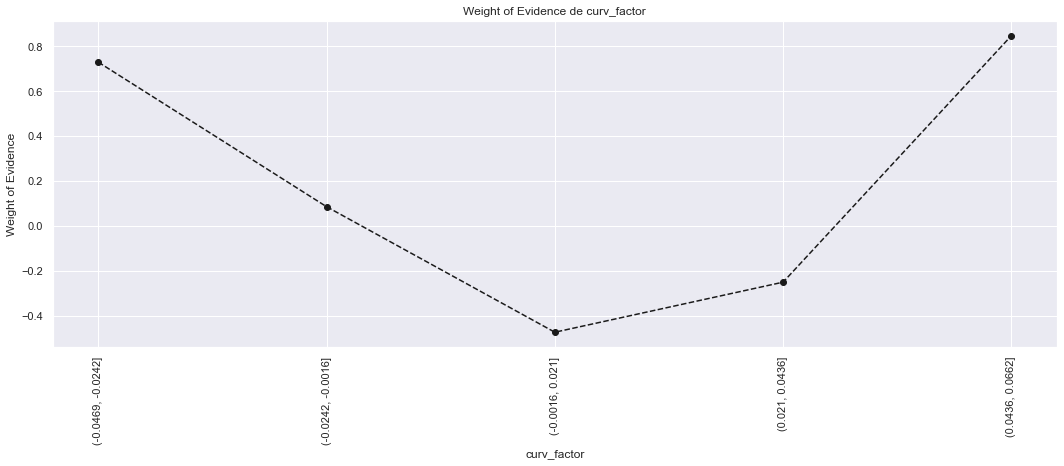

In [99]:
plot_by_woe(df_temp, 90)

In [106]:
# Por semelhança do WoF e/ou número de ocorrências temos as seguintes categorias: 
# '-0.0469*-0.0242', '-0.0242*-0.0016', '-0.0016*0.021', '>0.021'
# '>0.021' será a categoria de referência
df_inputs_prepr['curv_factor:-0.0469*-0.0242'] = np.where((df_inputs_prepr['curv'] >= -0.0469) & (df_inputs_prepr['curv'] <=  -0.0242), 1, 0)
df_inputs_prepr['curv_factor:-0.0242*-0.0016'] = np.where((df_inputs_prepr['curv'] >  -0.0242) & (df_inputs_prepr['curv'] <= -0.0016), 1, 0)
df_inputs_prepr['curv_factor:-0.0016*0.021'] = np.where((df_inputs_prepr['curv'] > -0.0016) & (df_inputs_prepr['curv'] <= 0.021), 1, 0)
df_inputs_prepr['curv_factor:>0.021'] = np.where((df_inputs_prepr['curv'] > 0.021), 1, 0)

<ipython-input-106-5a05a342bc88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['curv_factor:-0.0469*-0.0242'] = np.where((df_inputs_prepr['curv'] >= -0.0469) & (df_inputs_prepr['curv'] <=  -0.0242), 1, 0)
<ipython-input-106-5a05a342bc88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['curv_factor:-0.0242*-0.0016'] = np.where((df_inputs_prepr['curv'] >  -0.0242) & (df_inputs_prepr['curv'] <= -0.0016), 1, 0)
<ipython-input-106-5a05a342bc88>:6: SettingWithCopyWarning: 
A va

In [107]:
df_inputs_prepr.head(5)

,slope,aspect,elevation,uso_solo,lito,twi,curv,uso_solo:1210,uso_solo:1220,uso_solo:1310,...,slope_factor,aspect_factor,elevation_factor,twi_factor,curv_factor,curv_factor:Missing,curv_factor:-0.0469*-0.0242,curv_factor:-0.0242*-0.0016,curv_factor:-0.0016*0.021,curv_factor:>0.021
50,2.836833,213.22340,23.9087,1320,2790,8.194330,-0.002012,0,0,0,...,"(0.945, 10.883]","(144.055, 214.373]","(0.674, 52.286]","(7.589, 8.667]","(-0.0242, -0.0016]",0,0,1,0,0
2,1.895332,215.47270,10.0025,2110,2790,10.594538,-0.020116,0,0,0,...,"(0.945, 10.883]","(214.373, 284.692]","(0.674, 52.286]","(9.746, 10.824]","(-0.0242, -0.0016]",0,0,1,0,0
17,21.251700,65.54922,66.7124,2300,1507,6.268551,-0.005590,0,0,0,...,"(20.773, 30.662]","(3.066, 73.736]","(52.286, 103.642]","(5.428, 6.511]","(-0.0242, -0.0016]",0,0,1,0,0
85,0.993954,140.54890,7.9504,2230,2790,8.201475,-0.004881,0,0,0,...,"(0.945, 10.883]","(73.736, 144.055]","(0.674, 52.286]","(7.589, 8.667]","(-0.0242, -0.0016]",0,0,1,0,0
5,13.063540,314.87300,63.2392,2230,2741,7.906289,-0.012354,0,0,0,...,"(10.883, 20.773]","(284.692, 355.01]","(52.286, 103.642]","(7.589, 8.667]","(-0.0242, -0.0016]",0,0,1,0,0
